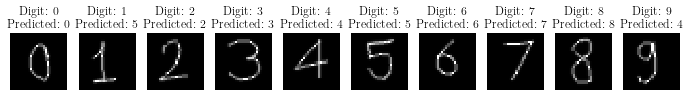

In [2]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
import os
import tensorflow as tf

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

X_test = np.zeros((10,28,28))

for i in range(10):
    digit_filename = "Consegnare/Pictures/" + str(i) + "b.png"
    digit_in = Image.open(digit_filename).convert('L')
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
    X_test[i] = data

X_test /= 255

save_model_path='Consegnare/CNN/Saved/SGDN'
model_CNN = tf.keras.models.load_model(filepath=save_model_path)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

predictions = model_CNN.predict(X_test)

plt.figure(figsize=(12, 3))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(i, np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()